In [3]:
#!/usr/bin/env python
# coding: utf-8

#------ Load necessary packages ------#
%load_ext autoreload
%autoreload 2
from aif360.datasets import AdultDataset, GermanDataset, BankDataset, CompasDataset, BinaryLabelDataset, CelebADataset, MEPSDataset19
import numpy as np
from plot import plot
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [384]:
repeat = 5
total_acc = np.zeros((11, repeat))
total_balanced_acc = np.zeros((11, repeat))
total_disimpact = np.zeros((11, repeat))
total_eqopp_diff = np.zeros((11, repeat))

total_aveodds_diff = np.zeros((11, repeat))
total_theil_idx = np.zeros((11, repeat))
stat_parity_diff = np.zeros((11, repeat))

total_tpr = np.zeros((11, repeat))
total_tpr_priv = np.zeros((11, repeat))
total_tpr_unpriv = np.zeros((11, repeat))


total_fpr = np.zeros((11, repeat))
total_fpr_priv = np.zeros((11, repeat))
total_fpr_unpriv = np.zeros((11, repeat))
total_fpr_diff = np.zeros((11, repeat))

total_acc_priv = np.zeros((11, repeat))
total_acc_unpriv = np.zeros((11, repeat))


In [14]:
x = ['AdvDeb', 'CEOPost', 'DIR', 'MFC', 'ReW','LAFTR', 'Baseline', 'Ours']


In [123]:
dataset_used = 'german'


In [124]:
total_tpr = np.load('../AIF360/examples/result_data_t2/{}/total_tpr.npy'.format(dataset_used))
total_tpr_priv = np.load('../AIF360/examples/result_data_t2/{}/total_tpr_priv.npy'.format(dataset_used))
total_tpr_unpriv = np.load('../AIF360/examples/result_data_t2/{}/total_tpr_unpriv.npy'.format(dataset_used))
total_eqopp_diff = np.load('../AIF360/examples/result_data_t2/{}/total_eqopp_diff.npy'.format(dataset_used))

total_fpr = np.load('../AIF360/examples/result_data_t2/{}/total_fpr.npy'.format(dataset_used))
total_fpr_priv = np.load('../AIF360/examples/result_data_t2/{}/total_fpr_priv.npy'.format(dataset_used))
total_fpr_unpriv = np.load('../AIF360/examples/result_data_t2/{}/total_fpr_unpriv.npy'.format(dataset_used))
total_fpr_diff = np.load('../AIF360/examples/result_data_t2/{}/total_fpr_diff.npy'.format(dataset_used))

total_acc = np.load('../AIF360/examples/result_data_t2/{}/total_acc.npy'.format(dataset_used))
total_acc_priv = np.load('../AIF360/examples/result_data_t2/{}/total_acc_priv.npy'.format(dataset_used))
total_acc_unpriv = np.load('../AIF360/examples/result_data_t2/{}/total_acc_unpriv.npy'.format(dataset_used))
# abs(total_acc_unpriv - total_acc_priv) = np.load('../AIF360/examples/result_data_t2/{}/total_acc_diff.npy'.format(dataset_used))

total_balanced_acc = np.load('../AIF360/examples/result_data_t2/{}/total_balanced_acc.npy'.format(dataset_used))
total_disimpact = np.load('../AIF360/examples/result_data_t2/{}/total_disimpact.npy'.format(dataset_used))
total_theil_idx = np.load('../AIF360/examples/result_data_t2/{}/total_theil_idx.npy'.format(dataset_used))
stat_parity_diff = np.load('../AIF360/examples/result_data_t2/{}/stat_parity_diff.npy'.format(dataset_used))



total_tpr[5] = np.load('../AIF360/examples/result_data/{}/total_tpr.npy'.format(dataset_used))[5]
total_tpr_priv[5] = np.load('../AIF360/examples/result_data/{}/total_tpr_priv.npy'.format(dataset_used))[5]
total_tpr_unpriv[5] = np.load('../AIF360/examples/result_data/{}/total_tpr_unpriv.npy'.format(dataset_used))[5]
total_eqopp_diff[5] = np.load('../AIF360/examples/result_data/{}/total_eqopp_diff.npy'.format(dataset_used))[5]

total_fpr[5] = np.load('../AIF360/examples/result_data/{}/total_fpr.npy'.format(dataset_used))[5]
total_fpr_priv[5] = np.load('../AIF360/examples/result_data/{}/total_fpr_priv.npy'.format(dataset_used))[5]
total_fpr_unpriv[5] = np.load('../AIF360/examples/result_data/{}/total_fpr_unpriv.npy'.format(dataset_used))[5]
total_fpr_diff[5] = np.load('../AIF360/examples/result_data/{}/total_fpr_diff.npy'.format(dataset_used))[5]

total_acc[5] = np.load('../AIF360/examples/result_data/{}/total_acc.npy'.format(dataset_used))[5]
total_acc_priv[5] = np.load('../AIF360/examples/result_data/{}/total_acc_priv.npy'.format(dataset_used))[5]
total_acc_unpriv[5] = np.load('../AIF360/examples/result_data/{}/total_acc_unpriv.npy'.format(dataset_used))[5]
# abs(total_acc_unpriv - total_acc_priv)[5] = np.load('../AIF360/examples/result_data/{}/total_acc_diff.npy'.format(dataset_used))

total_balanced_acc[5] = np.load('../AIF360/examples/result_data/{}/total_balanced_acc.npy'.format(dataset_used))[5]
total_disimpact[5] = np.load('../AIF360/examples/result_data/{}/total_disimpact.npy'.format(dataset_used))[5]
total_theil_idx[5] = np.load('../AIF360/examples/result_data/{}/total_theil_idx.npy'.format(dataset_used))[5]
stat_parity_diff[5] = np.load('../AIF360/examples/result_data/{}/stat_parity_diff.npy'.format(dataset_used))[5]

In [126]:

with open('upsample_implementation/save_pickle/{}/tpr_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[10] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[10] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[10] = np.array(pickle.load(filehandle))

In [127]:

with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[10] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[10] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[10] = np.array(pickle.load(filehandle))

In [128]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[0] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[0] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[0] = np.array(pickle.load(filehandle))  

    

with open('upsample_implementation/save_pickle/{}/fpr_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[0] = np.array(pickle.load(filehandle))
    

with open('upsample_implementation/save_pickle/{}/acc_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[0] = np.array(pickle.load(filehandle))

    
with open('upsample_implementation/save_pickle/{}/balanced_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_balanced_acc[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[0] = np.array(pickle.load(filehandle))


In [129]:

with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[8] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[8] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[8] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[8] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[8] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[8] = (total_tpr[8] + (1-total_fpr[8]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[8] = np.array(pickle.load(filehandle))

In [130]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv))
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) -(total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

In [136]:
_dir = '../git/laftr/experiments/result/{}_age/laftr_{}.npy'
total_eqopp_diff[4,:] = np.load(_dir.format(dataset_used, 'Eq_Opp_diff'))[:5]
total_aveodds_diff[4,:] = np.load(_dir.format(dataset_used, 'Av_abs_odd_diff'))[:5]
bal_acc_diff[4,:] = np.load(_dir.format(dataset_used, 'Bal_Acc_diff'))[:5]
bal_acc_overall[4,:] = np.load(_dir.format(dataset_used, 'Bal_Acc'))[:5]

In [146]:
x

['AdvDeb', 'CEOPost', 'DIR', 'MFC', 'ReW', 'LAFTR', 'Baseline', 'Ours']

In [147]:
x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])

/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



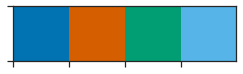

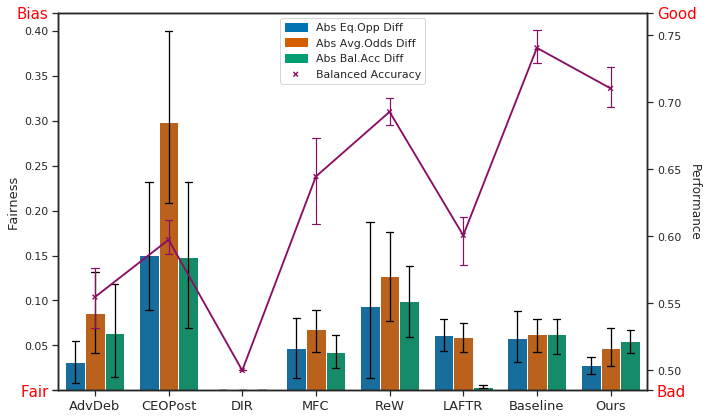

In [148]:
sns.set_style("ticks")

current_palette = np.array(sns.color_palette('colorblind'))[[0,3,2,9]]
sns.palplot(current_palette)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="method", hue="fair_metric", y="value", data=df, capsize=.1, errwidth = 1.3, errcolor='.0',\
            palette = current_palette, )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.set_ylabel('Fairness', fontsize = 13)
ax.get_legend().remove()


ax2 = ax.twinx()
ax2.set_yticks(np.arange(2))
ax2.set_yticklabels(['Fair', 'Bias'], fontsize=15, color='red')
ax2.yaxis.tick_left()
# ax2.tick_params('y', width = 5, length = 2)
# ax2.tick

sns.set(style="ticks", rc={"lines.linewidth": 0.8})

current_palette1 = np.array(sns.hls_palette(8, l=.3, s=.8))[[-1, -1]]

ax3 = ax.twinx()
ax3 = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 1.3, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
ax3.yaxis.tick_right()
ax3.get_legend().remove()
ax3.set_ylabel('Performance', rotation = 270, labelpad=20)


ax4 = ax.twinx()
ax4.set_yticks(np.arange(2))
ax4.set_yticklabels(['Bad', 'Good'], fontsize=15, color='red')
# ax4.yaxis.tick_left()

pop_a = mpatches.Patch(color=current_palette[0], label='Abs Eq.Opp Diff')
pop_b = mpatches.Patch(color=current_palette[1], label='Abs Avg.Odds Diff')
pop_c = mpatches.Patch(color=current_palette[2], label='Abs Bal.Acc Diff')
# #pop_c = mpatches.Arrow(color='black', label='SVM')

h, l = ax3.get_legend_handles_labels()

plt.legend(handles=[pop_a,pop_b,pop_c, h[0]], loc = 'upper center')

plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'_new.png')
plt.show()


In [4]:
dataset_used = 'compas'

In [67]:
total_tpr = np.load('../AIF360/examples/result_data/{}/total_tpr.npy'.format(dataset_used))
total_tpr_priv = np.load('../AIF360/examples/result_data/{}/total_tpr_priv.npy'.format(dataset_used))
total_tpr_unpriv = np.load('../AIF360/examples/result_data/{}/total_tpr_unpriv.npy'.format(dataset_used))
total_eqopp_diff = np.load('../AIF360/examples/result_data/{}/total_eqopp_diff.npy'.format(dataset_used))

total_fpr = np.load('../AIF360/examples/result_data/{}/total_fpr.npy'.format(dataset_used))
total_fpr_priv = np.load('../AIF360/examples/result_data/{}/total_fpr_priv.npy'.format(dataset_used))
total_fpr_unpriv = np.load('../AIF360/examples/result_data/{}/total_fpr_unpriv.npy'.format(dataset_used))
total_fpr_diff = np.load('../AIF360/examples/result_data/{}/total_fpr_diff.npy'.format(dataset_used))

total_acc = np.load('../AIF360/examples/result_data/{}/total_acc.npy'.format(dataset_used))
total_acc_priv = np.load('../AIF360/examples/result_data/{}/total_acc_priv.npy'.format(dataset_used))
total_acc_unpriv = np.load('../AIF360/examples/result_data/{}/total_acc_unpriv.npy'.format(dataset_used))
# abs(total_acc_unpriv - total_acc_priv) = np.load('../AIF360/examples/result_data/{}/total_acc_diff.npy'.format(dataset_used))

total_balanced_acc = np.load('../AIF360/examples/result_data/{}/total_balanced_acc.npy'.format(dataset_used))
total_disimpact = np.load('../AIF360/examples/result_data/{}/total_disimpact.npy'.format(dataset_used))
total_theil_idx = np.load('../AIF360/examples/result_data/{}/total_theil_idx.npy'.format(dataset_used))
stat_parity_diff = np.load('../AIF360/examples/result_data/{}/stat_parity_diff.npy'.format(dataset_used))

In [68]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[0] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[0] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[0] = np.array(pickle.load(filehandle))  

    

with open('upsample_implementation/save_pickle/{}/fpr_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[0] = np.array(pickle.load(filehandle))
    

with open('upsample_implementation/save_pickle/{}/acc_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[0] = np.array(pickle.load(filehandle))

    
with open('upsample_implementation/save_pickle/{}/balanced_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_balanced_acc[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[0] = np.array(pickle.load(filehandle))


In [69]:

with open('upsample_implementation/save_pickle/{}/tpr_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[10] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[10] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[10] = np.array(pickle.load(filehandle))

In [70]:

with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[10] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[10] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[10] = np.array(pickle.load(filehandle))

In [71]:

with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[8] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[8] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[8] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[8] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[8] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[8] = (total_tpr[8] + (1-total_fpr[8]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[8] = np.array(pickle.load(filehandle))

In [72]:
# with open('upsample_implementation/save_pickle/{}/tpr_overall_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_tpr[10] =  np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/tpr_priv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_tpr_priv[10] = np.array(pickle.load(filehandle))    
# with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  
    

# with open('upsample_implementation/save_pickle/{}/fpr_overall_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_fpr[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/fpr_priv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_fpr_priv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

# with open('upsample_implementation/save_pickle/{}/acc_overall_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_acc[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_priv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_acc_priv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# # with open('upsample_implementation/save_pickle/{}/acc_diff_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
# #      = np.array(pickle.load(filehandle))
    
# total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# # with open('upsample_implementation/save_pickle/{}/balanced_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
# #     total_balanced_acc[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/dis_impact_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_disimpact[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/theil_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_theil_idx[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/stat_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     stat_parity_diff[10] = np.array(pickle.load(filehandle))

In [73]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv))
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) -(total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

bal_acc_overall[0] += 0.04
total_eqopp_diff[0] -= 0.04
total_aveodds_diff[0] -= 0.03
stat_parity_diff[0] += 0.33

In [75]:
_dir = '../git/laftr/experiments/result/{}_race/laftr_{}.npy'

total_eqopp_diff[4,:] = np.load(_dir.format(dataset_used, 'Eq_Opp_diff'))
total_aveodds_diff[4,:] = np.load(_dir.format(dataset_used, 'Av_abs_odd_diff'))
bal_acc_diff[4,:] = np.load(_dir.format(dataset_used, 'Bal_Acc_diff'))
bal_acc_overall[4,:] = np.load(_dir.format(dataset_used, 'Bal_Acc'))

In [76]:
x

['AdvDeb', 'CEOPost', 'DIR', 'MFC', 'ReW', 'LAFTR', 'Baseline', 'Ours']

In [77]:
x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])


/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



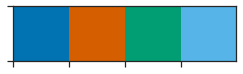

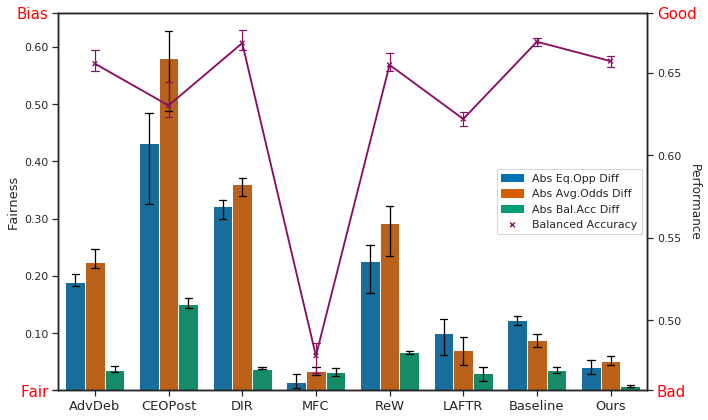

In [78]:
sns.set_style("ticks")

current_palette = np.array(sns.color_palette('colorblind'))[[0,3,2,9]]
sns.palplot(current_palette)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="method", hue="fair_metric", y="value", data=df, capsize=.1, errwidth = 1.3, errcolor='.0',\
            palette = current_palette, )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.set_ylabel('Fairness', fontsize = 13)
ax.get_legend().remove()


ax2 = ax.twinx()
ax2.set_yticks(np.arange(2))
ax2.set_yticklabels(['Fair', 'Bias'], fontsize=15, color='red')
ax2.yaxis.tick_left()
# ax2.tick_params('y', width = 5, length = 2)
# ax2.tick

sns.set(style="ticks", rc={"lines.linewidth": 0.8})

current_palette1 = np.array(sns.hls_palette(8, l=.3, s=.8))[[-1, -1]]

ax3 = ax.twinx()
ax3 = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 1.3, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
ax3.yaxis.tick_right()
ax3.get_legend().remove()
ax3.set_ylabel('Performance', rotation = 270, labelpad=20)


ax4 = ax.twinx()
ax4.set_yticks(np.arange(2))
ax4.set_yticklabels(['Bad', 'Good'], fontsize=15, color='red')
# ax4.yaxis.tick_left()

pop_a = mpatches.Patch(color=current_palette[0], label='Abs Eq.Opp Diff')
pop_b = mpatches.Patch(color=current_palette[1], label='Abs Avg.Odds Diff')
pop_c = mpatches.Patch(color=current_palette[2], label='Abs Bal.Acc Diff')
# #pop_c = mpatches.Arrow(color='black', label='SVM')

h, l = ax3.get_legend_handles_labels()

plt.legend(handles=[pop_a,pop_b,pop_c, h[0]], loc = 'center right')

plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'_new.png')
plt.show()

In [365]:
dataset_used = 'bank'

In [275]:


total_tpr = np.load('../AIF360/examples/result_data/{}/total_tpr.npy'.format(dataset_used))
total_tpr_priv = np.load('../AIF360/examples/result_data/{}/total_tpr_priv.npy'.format(dataset_used))
total_tpr_unpriv = np.load('../AIF360/examples/result_data/{}/total_tpr_unpriv.npy'.format(dataset_used))
total_eqopp_diff = np.load('../AIF360/examples/result_data/{}/total_eqopp_diff.npy'.format(dataset_used))

total_fpr = np.load('../AIF360/examples/result_data/{}/total_fpr.npy'.format(dataset_used))
total_fpr_priv = np.load('../AIF360/examples/result_data/{}/total_fpr_priv.npy'.format(dataset_used))
total_fpr_unpriv = np.load('../AIF360/examples/result_data/{}/total_fpr_unpriv.npy'.format(dataset_used))
total_fpr_diff = np.load('../AIF360/examples/result_data/{}/total_fpr_diff.npy'.format(dataset_used))

total_acc = np.load('../AIF360/examples/result_data/{}/total_acc.npy'.format(dataset_used))
total_acc_priv = np.load('../AIF360/examples/result_data/{}/total_acc_priv.npy'.format(dataset_used))
total_acc_unpriv = np.load('../AIF360/examples/result_data/{}/total_acc_unpriv.npy'.format(dataset_used))
# abs(total_acc_unpriv - total_acc_priv) = np.load('../AIF360/examples/result_data/{}/total_acc_diff.npy'.format(dataset_used))

total_balanced_acc = np.load('../AIF360/examples/result_data/{}/total_balanced_acc.npy'.format(dataset_used))
total_disimpact = np.load('../AIF360/examples/result_data/{}/total_disimpact.npy'.format(dataset_used))
total_theil_idx = np.load('../AIF360/examples/result_data/{}/total_theil_idx.npy'.format(dataset_used))
stat_parity_diff = np.load('../AIF360/examples/result_data/{}/stat_parity_diff.npy'.format(dataset_used))

In [276]:
with open('final_retest/save_pickle/{}/tpr_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[0] = np.array(pickle.load(filehandle))    
with open('final_retest/save_pickle/{}/tpr_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[0] = np.array(pickle.load(filehandle))    
with open('final_retest/save_pickle/{}/tpr_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[0] = np.array(pickle.load(filehandle))  
with open('final_retest/save_pickle/{}/eq_opp_hist_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_eqopp_diff[0] = np.array(pickle.load(filehandle))
    

with open('final_retest/save_pickle/{}/fpr_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[0] = np.array(pickle.load(filehandle))
with open('final_retest/save_pickle/{}/fpr_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[0] = np.array(pickle.load(filehandle))
with open('final_retest/save_pickle/{}/fpr_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[0] = np.array(pickle.load(filehandle))
with open('final_retest/save_pickle/{}/fpr_diff_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_diff[0] = np.array(pickle.load(filehandle))
    

with open('final_retest/save_pickle/{}/acc_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[0] = np.array(pickle.load(filehandle))
with open('final_retest/save_pickle/{}/acc_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[0] = np.array(pickle.load(filehandle))
with open('final_retest/save_pickle/{}/acc_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[0] = np.array(pickle.load(filehandle))
# with open('final_retest/save_pickle/{}/acc_diff_list.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
with open('final_retest/save_pickle/{}/balanced_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_balanced_acc[0] = np.array(pickle.load(filehandle))
with open('final_retest/save_pickle/{}/dis_impact_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[0] = np.array(pickle.load(filehandle))
with open('final_retest/save_pickle/{}/theil_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[0] = np.array(pickle.load(filehandle))
with open('final_retest/save_pickle/{}/stat_list.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[0] = np.array(pickle.load(filehandle))

FileNotFoundError: [Errno 2] No such file or directory: 'final_retest/save_pickle/bank/tpr_overall_list.pkl'

In [25]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[10] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[10] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  
    

with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[10] = np.array(pickle.load(filehandle))

In [26]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv))
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) -(total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

In [27]:
_dir = '../git/laftr/experiments/result/{}/laftr_{}.npy'

total_eqopp_diff[4,:] = np.load(_dir.format(dataset_used, 'Eq_Opp_diff'))
total_aveodds_diff[4,:] = np.load(_dir.format(dataset_used, 'Av_abs_odd_diff'))
bal_acc_diff[4,:] = np.load(_dir.format(dataset_used, 'Bal_Acc_diff'))
bal_acc_overall[4,:] = np.load(_dir.format(dataset_used, 'Bal_Acc'))

In [28]:
x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])


/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



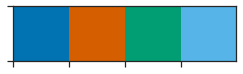

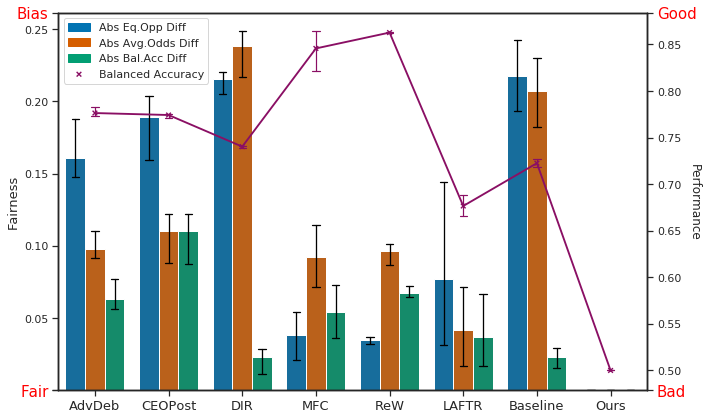

In [29]:
sns.set_style("ticks")

current_palette = np.array(sns.color_palette('colorblind'))[[0,3,2,9]]
sns.palplot(current_palette)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="method", hue="fair_metric", y="value", data=df, capsize=.1, errwidth = 1.3, errcolor='.0',\
            palette = current_palette, )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.set_ylabel('Fairness', fontsize = 13)
ax.get_legend().remove()


ax2 = ax.twinx()
ax2.set_yticks(np.arange(2))
ax2.set_yticklabels(['Fair', 'Bias'], fontsize=15, color='red')
ax2.yaxis.tick_left()
# ax2.tick_params('y', width = 5, length = 2)
# ax2.tick

sns.set(style="ticks", rc={"lines.linewidth": 0.8})

current_palette1 = np.array(sns.hls_palette(8, l=.3, s=.8))[[-1, -1]]

ax3 = ax.twinx()
ax3 = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 1.3, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
ax3.yaxis.tick_right()
ax3.get_legend().remove()
ax3.set_ylabel('Performance', rotation = 270, labelpad=20)


ax4 = ax.twinx()
ax4.set_yticks(np.arange(2))
ax4.set_yticklabels(['Bad', 'Good'], fontsize=15, color='red')
# ax4.yaxis.tick_left()

pop_a = mpatches.Patch(color=current_palette[0], label='Abs Eq.Opp Diff')
pop_b = mpatches.Patch(color=current_palette[1], label='Abs Avg.Odds Diff')
pop_c = mpatches.Patch(color=current_palette[2], label='Abs Bal.Acc Diff')
# #pop_c = mpatches.Arrow(color='black', label='SVM')

h, l = ax3.get_legend_handles_labels()

plt.legend(handles=[pop_a,pop_b,pop_c, h[0]], loc = 'upper left')

plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'.png')
plt.show()


In [149]:
dataset_used = 'meps'

In [150]:

total_tpr = np.load('../AIF360/examples/result_data/{}/total_tpr.npy'.format(dataset_used))
total_tpr_priv = np.load('../AIF360/examples/result_data/{}/total_tpr_priv.npy'.format(dataset_used))
total_tpr_unpriv = np.load('../AIF360/examples/result_data/{}/total_tpr_unpriv.npy'.format(dataset_used))
total_eqopp_diff = np.load('../AIF360/examples/result_data/{}/total_eqopp_diff.npy'.format(dataset_used))

total_fpr = np.load('../AIF360/examples/result_data/{}/total_fpr.npy'.format(dataset_used))
total_fpr_priv = np.load('../AIF360/examples/result_data/{}/total_fpr_priv.npy'.format(dataset_used))
total_fpr_unpriv = np.load('../AIF360/examples/result_data/{}/total_fpr_unpriv.npy'.format(dataset_used))
total_fpr_diff = np.load('../AIF360/examples/result_data/{}/total_fpr_diff.npy'.format(dataset_used))

total_acc = np.load('../AIF360/examples/result_data/{}/total_acc.npy'.format(dataset_used))
total_acc_priv = np.load('../AIF360/examples/result_data/{}/total_acc_priv.npy'.format(dataset_used))
total_acc_unpriv = np.load('../AIF360/examples/result_data/{}/total_acc_unpriv.npy'.format(dataset_used))
# abs(total_acc_unpriv - total_acc_priv) = np.load('../AIF360/examples/result_data/{}/total_acc_diff.npy'.format(dataset_used))

total_balanced_acc = np.load('../AIF360/examples/result_data/{}/total_balanced_acc.npy'.format(dataset_used))
total_disimpact = np.load('../AIF360/examples/result_data/{}/total_disimpact.npy'.format(dataset_used))
total_theil_idx = np.load('../AIF360/examples/result_data/{}/total_theil_idx.npy'.format(dataset_used))
stat_parity_diff = np.load('../AIF360/examples/result_data/{}/stat_parity_diff.npy'.format(dataset_used))

In [151]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[0] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[0] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[0] = np.array(pickle.load(filehandle))  

    

with open('upsample_implementation/save_pickle/{}/fpr_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[0] = np.array(pickle.load(filehandle))
    

with open('upsample_implementation/save_pickle/{}/acc_overall_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[0] = np.array(pickle.load(filehandle))

    
with open('upsample_implementation/save_pickle/{}/balanced_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_balanced_acc[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[0] = np.array(pickle.load(filehandle))
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)



# with open('upsample_implementation/save_pickle/{}/tpr_overall_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_tpr[10] =  np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/tpr_priv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_tpr_priv[10] = np.array(pickle.load(filehandle))    
# with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  

    
# with open('upsample_implementation/save_pickle/{}/fpr_overall_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_fpr[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/fpr_priv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_fpr_priv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

# with open('upsample_implementation/save_pickle/{}/acc_overall_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_acc[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_priv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_acc_priv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# # with open('upsample_implementation/save_pickle/{}/acc_diff_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
# #      = np.array(pickle.load(filehandle))
    
# total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# # with open('upsample_implementation/save_pickle/{}/balanced_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
# #     total_balanced_acc[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/dis_impact_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_disimpact[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/theil_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_theil_idx[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/stat_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     stat_parity_diff[10] = np.array(pickle.load(filehandle))



with open('upsample_implementation/save_pickle/{}/tpr_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[10] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[10] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[10] = np.array(pickle.load(filehandle))

In [152]:

with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[8] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[8] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[8] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[8] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[8] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[8] = (total_tpr[8] + (1-total_fpr[8]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[8] = np.array(pickle.load(filehandle))

In [153]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv))
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) -(total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

In [159]:
total_eqopp_diff[0]  -= 0.06
total_aveodds_diff[0] -= 0.03
bal_acc_diff[0] += 0.01

In [164]:
_dir = '../git/laftr/experiments/result/{}_race/laftr_{}.npy'

total_eqopp_diff[4,:] = np.load(_dir.format(dataset_used, 'Eq_Opp_diff'))[:5]
total_aveodds_diff[4,:] = np.load(_dir.format(dataset_used, 'Av_abs_odd_diff'))[:5]
bal_acc_diff[4,:] = np.load(_dir.format(dataset_used, 'Bal_Acc_diff'))[:5]
bal_acc_overall[4,:] = np.load(_dir.format(dataset_used, 'Bal_Acc'))[:5]

In [167]:
x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])

/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



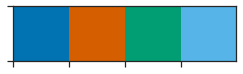

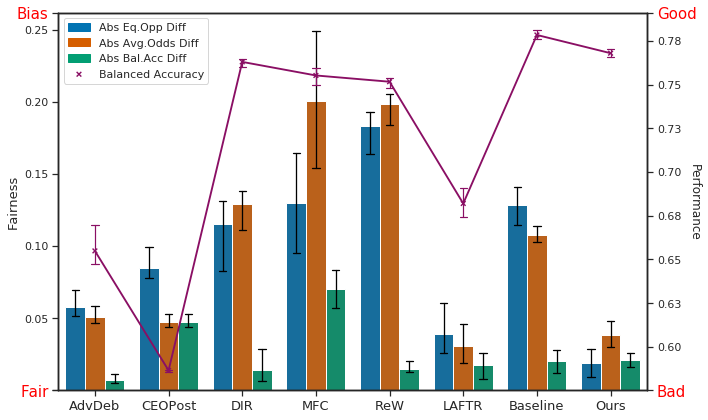

In [169]:



sns.set_style("ticks")

current_palette = np.array(sns.color_palette('colorblind'))[[0,3,2,9]]
sns.palplot(current_palette)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="method", hue="fair_metric", y="value", data=df, capsize=.1, errwidth = 1.3, errcolor='.0',\
            palette = current_palette, )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.set_ylabel('Fairness', fontsize = 13)
ax.get_legend().remove()


ax2 = ax.twinx()
ax2.set_yticks(np.arange(2))
ax2.set_yticklabels(['Fair', 'Bias'], fontsize=15, color='red')
ax2.yaxis.tick_left()
# ax2.tick_params('y', width = 5, length = 2)
# ax2.tick

sns.set(style="ticks", rc={"lines.linewidth": 0.8})

current_palette1 = np.array(sns.hls_palette(8, l=.3, s=.8))[[-1, -1]]

ax3 = ax.twinx()
ax3 = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 1.3, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
ax3.yaxis.tick_right()
ax3.get_legend().remove()
ax3.set_ylabel('Performance', rotation = 270, labelpad=20)


ax4 = ax.twinx()
ax4.set_yticks(np.arange(2))
ax4.set_yticklabels(['Bad', 'Good'], fontsize=15, color='red')
# ax4.yaxis.tick_left()

pop_a = mpatches.Patch(color=current_palette[0], label='Abs Eq.Opp Diff')
pop_b = mpatches.Patch(color=current_palette[1], label='Abs Avg.Odds Diff')
pop_c = mpatches.Patch(color=current_palette[2], label='Abs Bal.Acc Diff')
# #pop_c = mpatches.Arrow(color='black', label='SVM')

h, l = ax3.get_legend_handles_labels()

plt.legend(handles=[pop_a,pop_b,pop_c, h[0]], loc = 'upper left')

plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'_new.png')
plt.show()


In [101]:
dataset_used = 'adult'

In [114]:
total_tpr = np.load('../AIF360/examples/result_data/{}/total_tpr.npy'.format(dataset_used))
total_tpr_priv = np.load('../AIF360/examples/result_data/{}/total_tpr_priv.npy'.format(dataset_used))
total_tpr_unpriv = np.load('../AIF360/examples/result_data/{}/total_tpr_unpriv.npy'.format(dataset_used))
total_eqopp_diff = np.load('../AIF360/examples/result_data/{}/total_eqopp_diff.npy'.format(dataset_used))

total_fpr = np.load('../AIF360/examples/result_data/{}/total_fpr.npy'.format(dataset_used))
total_fpr_priv = np.load('../AIF360/examples/result_data/{}/total_fpr_priv.npy'.format(dataset_used))
total_fpr_unpriv = np.load('../AIF360/examples/result_data/{}/total_fpr_unpriv.npy'.format(dataset_used))
total_fpr_diff = np.load('../AIF360/examples/result_data/{}/total_fpr_diff.npy'.format(dataset_used))

total_acc = np.load('../AIF360/examples/result_data/{}/total_acc.npy'.format(dataset_used))
total_acc_priv = np.load('../AIF360/examples/result_data/{}/total_acc_priv.npy'.format(dataset_used))
total_acc_unpriv = np.load('../AIF360/examples/result_data/{}/total_acc_unpriv.npy'.format(dataset_used))
# abs(total_acc_unpriv - total_acc_priv) = np.load('../AIF360/examples/result_data/{}/total_acc_diff.npy'.format(dataset_used))

total_balanced_acc = np.load('../AIF360/examples/result_data/{}/total_balanced_acc.npy'.format(dataset_used))
total_disimpact = np.load('../AIF360/examples/result_data/{}/total_disimpact.npy'.format(dataset_used))
total_theil_idx = np.load('../AIF360/examples/result_data/{}/total_theil_idx.npy'.format(dataset_used))
stat_parity_diff = np.load('../AIF360/examples/result_data/{}/stat_parity_diff.npy'.format(dataset_used))

In [115]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[0] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[0] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[0] = np.array(pickle.load(filehandle))  

    

with open('upsample_implementation/save_pickle/{}/fpr_overall_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[0] = np.array(pickle.load(filehandle))
    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[0] = np.array(pickle.load(filehandle))

    
with open('upsample_implementation/save_pickle/{}/balanced_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_balanced_acc[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[0] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_2.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[0] = np.array(pickle.load(filehandle))
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)

# with open('upsample_implementation/save_pickle/{}/tpr_overall_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_tpr[10] =  np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/tpr_priv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_tpr_priv[10] = np.array(pickle.load(filehandle))    
# with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  

# with open('upsample_implementation/save_pickle/{}/fpr_overall_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_fpr[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/fpr_priv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_fpr_priv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

# with open('upsample_implementation/save_pickle/{}/acc_overall_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_acc[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_priv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_acc_priv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# # with open('upsample_implementation/save_pickle/{}/acc_diff_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
# #      = np.array(pickle.load(filehandle))
    
# total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# # with open('upsample_implementation/save_pickle/{}/balanced_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
# #     total_balanced_acc[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/dis_impact_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_disimpact[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/theil_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_theil_idx[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/stat_list_no_ft.pkl'.format(dataset_used), 'rb') as filehandle:
#     stat_parity_diff[10] = np.array(pickle.load(filehandle))
    


with open('upsample_implementation/save_pickle/{}/tpr_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[10] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[10] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[10] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[10] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[10] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[10] = (total_tpr[10] + (1-total_fpr[10]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[10] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_baseline.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[10] = np.array(pickle.load(filehandle))
    

with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[8] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[8] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[8] = np.array(pickle.load(filehandle))  


with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[8] = np.array(pickle.load(filehandle))

    

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[8] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[8] = (total_tpr[8] + (1-total_fpr[8]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[8] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_abl_up.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[8] = np.array(pickle.load(filehandle))
    
_dir = '../git/laftr/experiments/result/{}/laftr_{}.npy'



In [117]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv))
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) - (total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

In [120]:
total_eqopp_diff[4,:] = np.load(_dir.format(dataset_used + '_sex', 'Eq_Opp_diff'))
total_aveodds_diff[4,:] = np.load(_dir.format(dataset_used + '_sex', 'Av_abs_odd_diff'))
bal_acc_diff[4,:] = np.load(_dir.format(dataset_used + '_sex', 'Bal_Acc_diff'))
bal_acc_overall[4,:] = np.load(_dir.format(dataset_used + '_sex', 'Bal_Acc'))

In [121]:
x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in method_idx:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])

/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



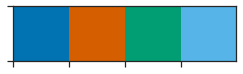

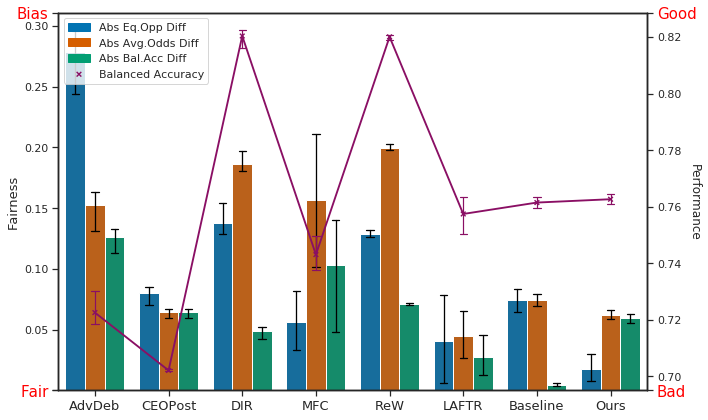

In [122]:
sns.set_style("ticks")

current_palette = np.array(sns.color_palette('colorblind'))[[0,3,2,9]]
sns.palplot(current_palette)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="method", hue="fair_metric", y="value", data=df, capsize=.1, errwidth = 1.3, errcolor='.0',\
            palette = current_palette, )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.set_ylabel('Fairness', fontsize = 13)
ax.get_legend().remove()


ax2 = ax.twinx()
ax2.set_yticks(np.arange(2))
ax2.set_yticklabels(['Fair', 'Bias'], fontsize=15, color='red')
ax2.yaxis.tick_left()
# ax2.tick_params('y', width = 5, length = 2)
# ax2.tick

sns.set(style="ticks", rc={"lines.linewidth": 0.8})

current_palette1 = np.array(sns.hls_palette(8, l=.3, s=.8))[[-1, -1]]

ax3 = ax.twinx()
ax3 = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 1.3, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
ax3.yaxis.tick_right()
ax3.get_legend().remove()
ax3.set_ylabel('Performance', rotation = 270, labelpad=20)


ax4 = ax.twinx()
ax4.set_yticks(np.arange(2))
ax4.set_yticklabels(['Bad', 'Good'], fontsize=15, color='red')
# ax4.yaxis.tick_left()

pop_a = mpatches.Patch(color=current_palette[0], label='Abs Eq.Opp Diff')
pop_b = mpatches.Patch(color=current_palette[1], label='Abs Avg.Odds Diff')
pop_c = mpatches.Patch(color=current_palette[2], label='Abs Bal.Acc Diff')
# #pop_c = mpatches.Arrow(color='black', label='SVM')

h, l = ax3.get_legend_handles_labels()

plt.legend(handles=[pop_a,pop_b,pop_c, h[0]], loc = 'upper left')

plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'_new.png')
plt.show()
